In [21]:
def extract_summary(file_path="data_input/data.csv", id=['936','1178']):
  """   
  Extract all relevant information, containing 6 variables
  start_date, end_date, total_spent, total_conversion, cpc_1, cpc_2
  """
  fb = pd.read_csv(file_path)
  campaigns = fb[fb['campaign_id'].isin(id)]
  campaigns = campaigns[campaigns.spent > 0]

  # Make sure to passed in appropriate preprocessing before extracting the start and end date
  campaigns['reporting_start'] = pd.to_datetime(campaigns['reporting_start'])
  start_date = campaigns['reporting_start'].min().strftime(format="%d %b %Y")
  end_date = campaigns['reporting_start'].max().strftime(format="%d %b %Y")

  total_spent = int(campaigns['spent'].sum())
  total_conversion = int(campaigns['total_conversion'].sum())

  # Create a cost per conversion dictionary per campaign
  # Cost per conversion is spent divided by total conversion
  cpc = campaigns.groupby(['campaign_id'])[['spent', 'total_conversion']].sum()
  cpc['CPC'] = cpc['spent']/cpc['total_conversion']
  cpc_each = dict()
  for each in id:
    cpc_each[each] = round(float(cpc[cpc.index == each]['CPC']), 2)

  return {
    "start_date": start_date,
    "end_date": end_date,
    "total_spent": total_spent,
    "total_conversion": total_conversion,
    "cpc": cpc_each
  }

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
file_path="data_input/data.csv" 
id=['936','1178']

fb = pd.read_csv(file_path)
campaigns = fb[fb['campaign_id'].isin(id)]
campaigns = campaigns[campaigns.spent > 0]

In [5]:
  campaigns['reporting_start'] = pd.to_datetime(campaigns['reporting_start'])
  start_date = campaigns['reporting_start'].min().strftime(format="%d %b %Y")
  end_date = campaigns['reporting_start'].max().strftime(format="%d %b %Y")

In [6]:
  total_spent = int(campaigns['spent'].sum())
  total_conversion = int(campaigns['total_conversion'].sum())

In [7]:
total_conversion

1398

In [8]:
cpc = campaigns.groupby(['campaign_id'])[['spent', 'total_conversion']].sum()
cpc['CPC'] = cpc['spent']/cpc['total_conversion']
cpc_each = dict()
for each in id:
    cpc_each[each] = round(float(cpc[cpc.index == each]['CPC']), 2)

In [11]:
cpc

,spent,total_conversion,CPC
campaign_id,,,
1178,16577.159998,1042.0,15.908983
936,2893.369999,356.0,8.127444


In [17]:
campaigns.head(3)

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
55,734210,2017-08-25,25/08/2017,936,108654,30-34,M,10,16,13,13329.0,4,5.63,1.0,1.0
56,734215,2017-08-26,26/08/2017,936,108655,30-34,M,15,19,17,13659.0,3,3.84,1.0,0.0
60,734290,2017-08-26,26/08/2017,936,108668,30-34,M,29,32,35,5374.0,1,1.04,4.0,0.0


In [10]:
grouped = campaigns.groupby(by=['campaign_id', 'age', 'reporting_start'], as_index=False)['total_conversion'].sum()
grouped.head()

,campaign_id,age,reporting_start,total_conversion
0,1178,30-34,2017-08-19,33.0
1,1178,30-34,2017-08-20,38.0
2,1178,30-34,2017-08-21,24.0
3,1178,30-34,2017-08-22,56.0
4,1178,30-34,2017-08-23,135.0


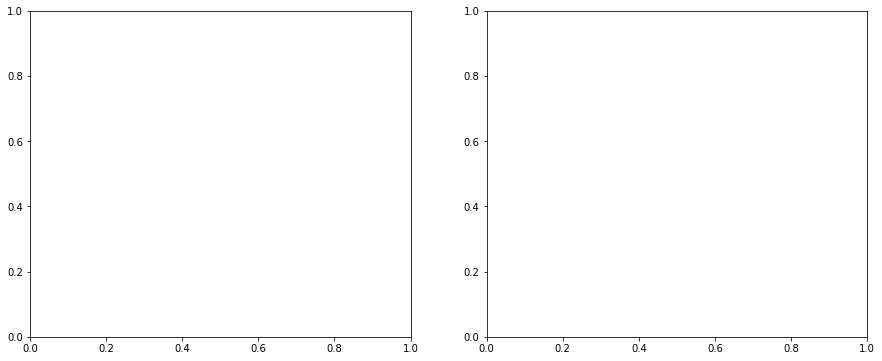

In [11]:
fig = plt.figure(1, figsize=(15,6))

# Iterate to create 1 plot campaign at a time
for i, campaign in enumerate(grouped.campaign_id.unique()):
    plt.subplot(1, len(id), i+1)

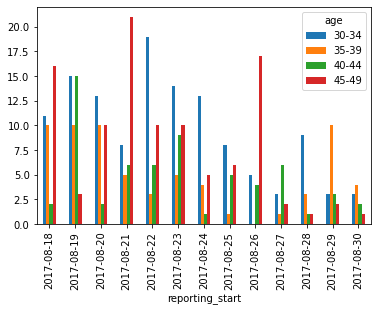

In [12]:
df = grouped[grouped['campaign_id'] == campaign].loc[:,['age', 'reporting_start', 'total_conversion']]
df['reporting_start'] = df['reporting_start'].dt.date
pivot = df.pivot(index='reporting_start', columns='age', values='total_conversion').fillna(0)
pivot.plot.bar(ax=plt.gca())

In [15]:
fig.suptitle('Campaign Conversion per Age Group', fontsize=20)
fig.autofmt_xdate()

# Save file to plot folder
imagename = 'plot/'+date.today().strftime(format="%d %b %Y")+'.png'
fig.savefig(imagename)

NameError: name 'date' is not defined

In [19]:
pivot.head()

age,30-34,35-39,40-44,45-49
reporting_start,,,,
2017-08-18,11.0,10.0,2.0,16.0
2017-08-19,15.0,10.0,15.0,3.0
2017-08-20,13.0,10.0,2.0,10.0
2017-08-21,8.0,5.0,6.0,21.0
2017-08-22,19.0,3.0,6.0,10.0


In [41]:
fig.suptitle('Campaign Conversion per Age Group', fontsize=20)
fig.autofmt_xdate()

# Save file to plot folder
imagename = 'plot/'+date.today().strftime(format="%d %b %Y")+'.png'
fig.savefig(imagename)

NameError: name 'date' is not defined

In [49]:
import os
EMAIL = os.environ['EMAIL_ADDRESS']
PASSWORD = os.environ['EMAIL_PASSWORD']
 
s = smtplib.SMTP("smtp.office365.com",587)
s.starttls() #Puts connection to SMTP server in TLS mode
s.login(EMAIL, PASSWORD)
 
msg = "\nsent with python for testing purpose"
s.sendmail(from_addr=EMAIL,to_addrs=["andarireksi@yahoo.com"], msg=msg)

KeyError: 'EMAIL_ADDRESS'

In [1]:
import os
EMAIL = os.environ['EMAIL_ADDRESS']
PASSWORD = os.environ['EMAIL_PASSWORD']

In [3]:
import smtplib

EMAIL = os.environ['EMAIL_ADDRESS']
PASSWORD = os.environ['EMAIL_PASSWORD']
 
s = smtplib.SMTP("smtp.office365.com",587)
s.starttls() #Puts connection to SMTP server in TLS mode
s.login(EMAIL, PASSWORD)
 
msg = "\nsent with python for testing purpose"
s.sendmail(from_addr=EMAIL,to_addrs=["tanesya@algorit.ma", "andarireksi@yahoo.com"], msg=msg)

{}